<a href="https://colab.research.google.com/github/mnfibin/AI-ML-Internship-Elevate_Labs/blob/main/Task%203/notebook/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Linear Regression for House Price Prediction**



>### ***STEP 1: IMPORT LIBRARIES***



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("=" * 70)
print("LINEAR REGRESSION - HOUSE PRICE PREDICTION")
print("=" * 70)

LINEAR REGRESSION - HOUSE PRICE PREDICTION




>### ***STEP 2: LOAD AND EXPLORE THE DATASET***



In [3]:
# Load the dataset
df = pd.read_csv('Housing.csv')

print("\n1. DATASET OVERVIEW")
print("-" * 70)
print(f"Dataset Shape: {df.shape}")
print(f"Number of Records: {df.shape[0]}")
print(f"Number of Features: {df.shape[1]}")

print("\n2. FIRST FEW ROWS")
print("-" * 70)
print(df.head())

print("\n3. DATASET INFORMATION")
print("-" * 70)
print(df.info())

print("\n4. STATISTICAL SUMMARY")
print("-" * 70)
print(df.describe())

print("\n5. MISSING VALUES CHECK")
print("-" * 70)
print(df.isnull().sum())


1. DATASET OVERVIEW
----------------------------------------------------------------------
Dataset Shape: (545, 13)
Number of Records: 545
Number of Features: 13

2. FIRST FEW ROWS
----------------------------------------------------------------------
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-

>### ***STEP 3: DATA PREPROCESSING***

In [4]:
print("\n" + "=" * 70)
print("DATA PREPROCESSING")
print("=" * 70)

# Create a copy for preprocessing
data = df.copy()

# Encode categorical variables
print("\n6. ENCODING CATEGORICAL VARIABLES")
print("-" * 70)

# List of categorical columns
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating',
                   'airconditioning', 'prefarea', 'furnishingstatus']

# Encode binary variables (yes/no) to 1/0
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating',
               'airconditioning', 'prefarea']

for col in binary_cols:
    data[col] = data[col].map({'yes': 1, 'no': 0})
    print(f"{col}: yes→1, no→0")

# Encode furnishing status (ordinal encoding)
furnishing_map = {'unfurnished': 0, 'semi-furnished': 1, 'furnished': 2}
data['furnishingstatus'] = data['furnishingstatus'].map(furnishing_map)
print(f"furnishingstatus: unfurnished→0, semi-furnished→1, furnished→2")

print("\n7. PREPROCESSED DATA")
print("-" * 70)
print(data.head())


DATA PREPROCESSING

6. ENCODING CATEGORICAL VARIABLES
----------------------------------------------------------------------
mainroad: yes→1, no→0
guestroom: yes→1, no→0
basement: yes→1, no→0
hotwaterheating: yes→1, no→0
airconditioning: yes→1, no→0
prefarea: yes→1, no→0
furnishingstatus: unfurnished→0, semi-furnished→1, furnished→2

7. PREPROCESSED DATA
----------------------------------------------------------------------
      price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  7420         4          2        3         1          0   
1  12250000  8960         4          4        4         1          0   
2  12250000  9960         3          2        2         1          0   
3  12215000  7500         4          2        2         1          0   
4  11410000  7420         4          1        2         1          1   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0         0                0                1        2         1   
1 

> ### ***STEP 4: EXPLORATORY DATA ANALYSIS***


EXPLORATORY DATA ANALYSIS

8. CORRELATION WITH PRICE
----------------------------------------------------------------------
price               1.000000
area                0.535997
bathrooms           0.517545
airconditioning     0.452954
stories             0.420712
parking             0.384394
bedrooms            0.366494
prefarea            0.329777
furnishingstatus    0.304721
mainroad            0.296898
guestroom           0.255517
basement            0.187057
hotwaterheating     0.093073
Name: price, dtype: float64


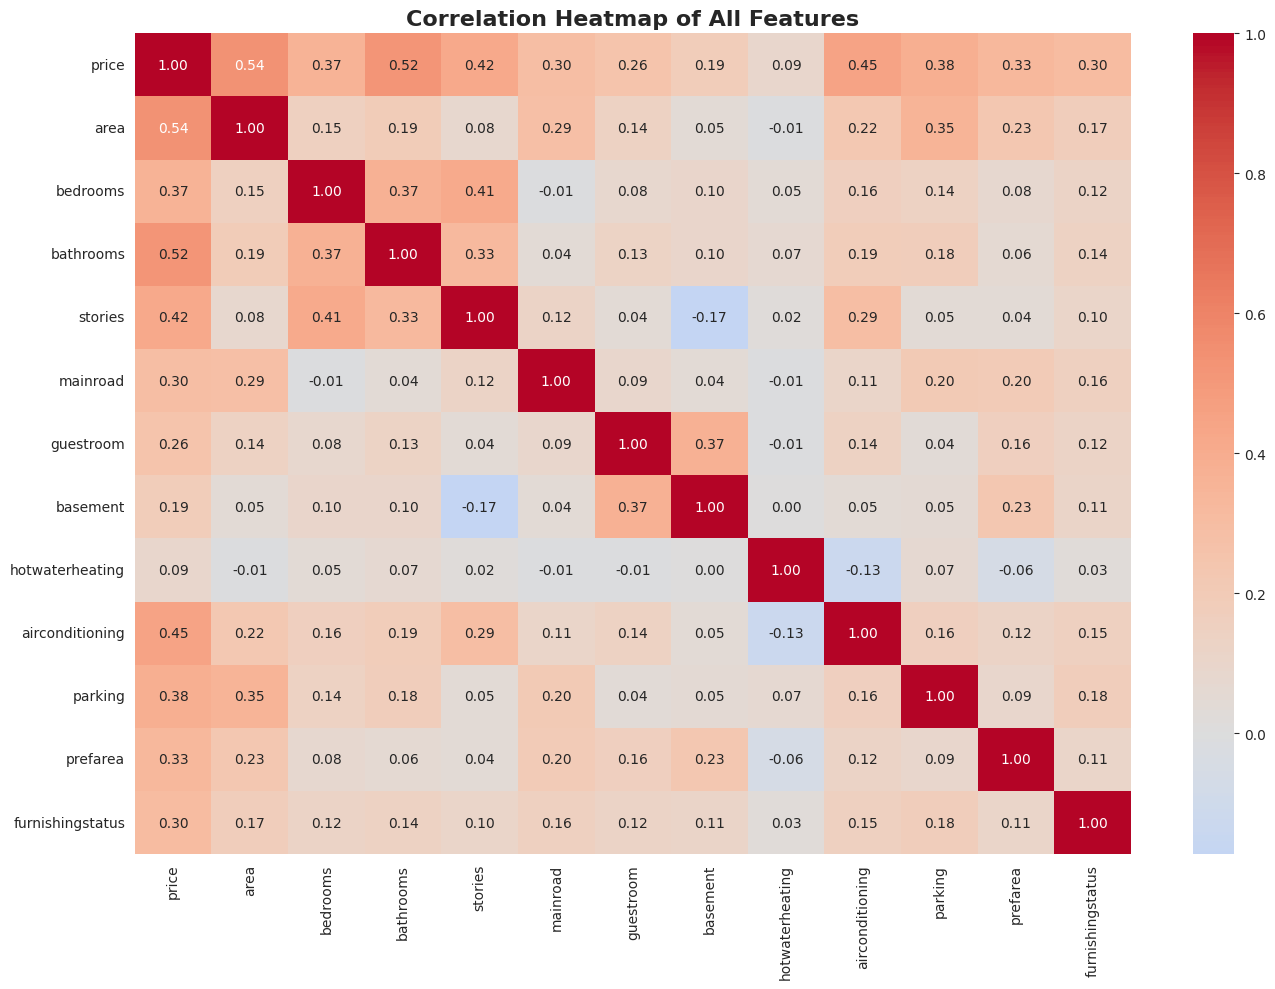

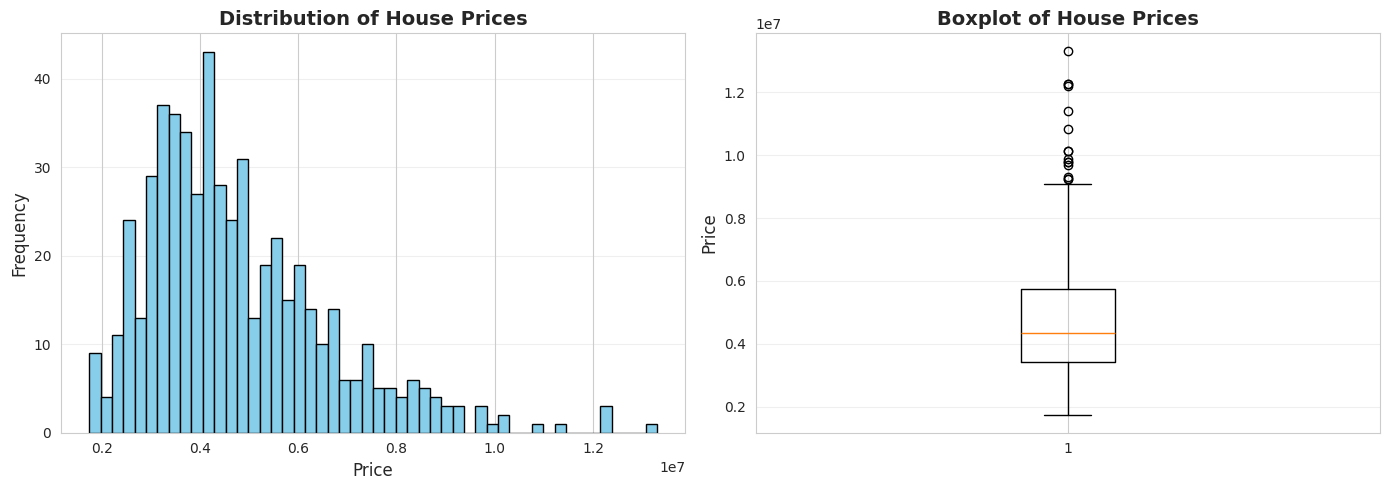

In [5]:
print("\n" + "=" * 70)
print("EXPLORATORY DATA ANALYSIS")
print("=" * 70)

# Correlation matrix
print("\n8. CORRELATION WITH PRICE")
print("-" * 70)
correlations = data.corr()['price'].sort_values(ascending=False)
print(correlations)

# Visualize correlation heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of All Features', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

# Distribution of target variable
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.hist(data['price'], bins=50, edgecolor='black', color='skyblue')
plt.xlabel('Price', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of House Prices', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)

plt.subplot(1, 2, 2)
plt.boxplot(data['price'], vert=True)
plt.ylabel('Price', fontsize=12)
plt.title('Boxplot of House Prices', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('price_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

> ### ***STEP 5: PREPARE FEATURES AND TARGET***

In [6]:
print("\n" + "=" * 70)
print("FEATURE AND TARGET PREPARATION")
print("=" * 70)

# Separate features (X) and target (y)
X = data.drop('price', axis=1)
y = data['price']

print(f"\nFeatures (X) shape: {X.shape}")
print(f"Target (y) shape: {y.shape}")
print(f"\nFeature columns: {list(X.columns)}")


FEATURE AND TARGET PREPARATION

Features (X) shape: (545, 12)
Target (y) shape: (545,)

Feature columns: ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']


> ### ***STEP 6: SPLIT DATA INTO TRAIN AND TEST SETS***

In [7]:
print("\n9. TRAIN-TEST SPLIT")
print("-" * 70)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training set size: {X_train.shape[0]} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Testing set size: {X_test.shape[0]} samples ({X_test.shape[0]/len(X)*100:.1f}%)")
print(f"Training features shape: {X_train.shape}")
print(f"Testing features shape: {X_test.shape}")


9. TRAIN-TEST SPLIT
----------------------------------------------------------------------
Training set size: 436 samples (80.0%)
Testing set size: 109 samples (20.0%)
Training features shape: (436, 12)
Testing features shape: (109, 12)


> ### ***STEP 7: BUILD AND TRAIN LINEAR REGRESSION MODEL***


MODEL TRAINING

10. Training Linear Regression model...
✓ Model training complete!

11. MODEL COEFFICIENTS
----------------------------------------------------------------------
         Feature  Coefficient
       bathrooms 1.097117e+06
 airconditioning 7.855506e+05
 hotwaterheating 6.878813e+05
        prefarea 6.299017e+05
         stories 4.062232e+05
        basement 3.931598e+05
        mainroad 3.668242e+05
       guestroom 2.331468e+05
         parking 2.257565e+05
furnishingstatus 2.103971e+05
        bedrooms 7.857449e+04
            area 2.358488e+02

Intercept: -127,711.17


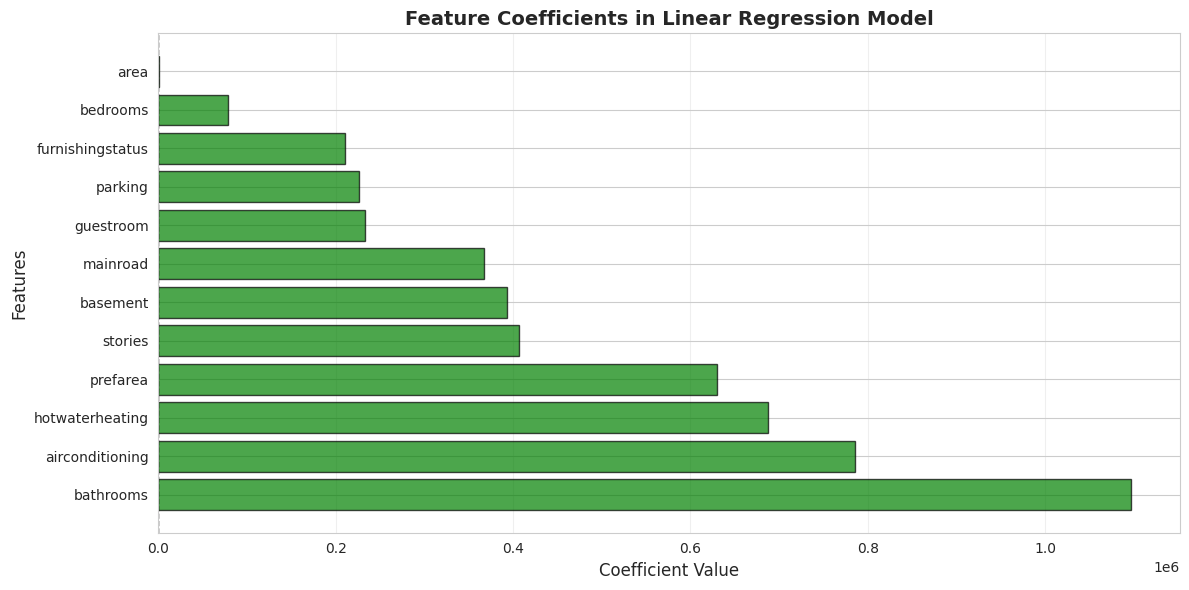

In [8]:
print("\n" + "=" * 70)
print("MODEL TRAINING")
print("=" * 70)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
print("\n10. Training Linear Regression model...")
model.fit(X_train, y_train)
print("✓ Model training complete!")

# Display model parameters
print("\n11. MODEL COEFFICIENTS")
print("-" * 70)
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values('Coefficient', ascending=False)

print(coefficients.to_string(index=False))
print(f"\nIntercept: {model.intercept_:,.2f}")

# Visualize coefficients
plt.figure(figsize=(12, 6))
colors = ['green' if x > 0 else 'red' for x in coefficients['Coefficient']]
plt.barh(coefficients['Feature'], coefficients['Coefficient'], color=colors, alpha=0.7, edgecolor='black')
plt.xlabel('Coefficient Value', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Feature Coefficients in Linear Regression Model', fontsize=14, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='--', linewidth=1)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig('feature_coefficients.png', dpi=300, bbox_inches='tight')
plt.show()

> ### ***STEP 8: MAKE PREDICTIONS***

In [9]:
print("\n" + "=" * 70)
print("PREDICTIONS")
print("=" * 70)

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("\n12. SAMPLE PREDICTIONS vs ACTUAL VALUES")
print("-" * 70)
comparison = pd.DataFrame({
    'Actual Price': y_test.values[:10],
    'Predicted Price': y_test_pred[:10],
    'Difference': y_test.values[:10] - y_test_pred[:10]
})
print(comparison.to_string(index=False))


PREDICTIONS

12. SAMPLE PREDICTIONS vs ACTUAL VALUES
----------------------------------------------------------------------
 Actual Price  Predicted Price    Difference
      4060000     5.203692e+06 -1.143692e+06
      6650000     7.257004e+06 -6.070040e+05
      3710000     3.062829e+06  6.471714e+05
      6440000     4.559592e+06  1.880408e+06
      2800000     3.332932e+06 -5.329323e+05
      4900000     3.563081e+06  1.336919e+06
      5250000     5.645466e+06 -3.954663e+05
      4543000     6.413980e+06 -1.870980e+06
      2450000     2.755832e+06 -3.058315e+05
      3353000     2.668939e+06  6.840613e+05


> ### ***STEP 9: MODEL EVALUATION***

In [10]:
print("\n" + "=" * 70)
print("MODEL EVALUATION")
print("=" * 70)

# Calculate metrics for training set
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

# Calculate metrics for test set
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

print("\n13. TRAINING SET METRICS")
print("-" * 70)
print(f"Mean Absolute Error (MAE):  ₹{train_mae:,.2f}")
print(f"Mean Squared Error (MSE):   {train_mse:,.2f}")
print(f"Root Mean Squared Error:    ₹{train_rmse:,.2f}")
print(f"R² Score:                   {train_r2:.4f} ({train_r2*100:.2f}%)")

print("\n14. TEST SET METRICS")
print("-" * 70)
print(f"Mean Absolute Error (MAE):  ₹{test_mae:,.2f}")
print(f"Mean Squared Error (MSE):   {test_mse:,.2f}")
print(f"Root Mean Squared Error:    ₹{test_rmse:,.2f}")
print(f"R² Score:                   {test_r2:.4f} ({test_r2*100:.2f}%)")

# Create metrics comparison table
metrics_df = pd.DataFrame({
    'Metric': ['MAE', 'MSE', 'RMSE', 'R² Score'],
    'Training Set': [train_mae, train_mse, train_rmse, train_r2],
    'Test Set': [test_mae, test_mse, test_rmse, test_r2]
})

print("\n15. METRICS COMPARISON")
print("-" * 70)
print(metrics_df.to_string(index=False))


MODEL EVALUATION

13. TRAINING SET METRICS
----------------------------------------------------------------------
Mean Absolute Error (MAE):  ₹718,146.60
Mean Squared Error (MSE):   969,902,818,698.31
Root Mean Squared Error:    ₹984,836.44
R² Score:                   0.6854 (68.54%)

14. TEST SET METRICS
----------------------------------------------------------------------
Mean Absolute Error (MAE):  ₹979,679.69
Mean Squared Error (MSE):   1,771,751,116,594.04
Root Mean Squared Error:    ₹1,331,071.42
R² Score:                   0.6495 (64.95%)

15. METRICS COMPARISON
----------------------------------------------------------------------
  Metric  Training Set     Test Set
     MAE  7.181466e+05 9.796797e+05
     MSE  9.699028e+11 1.771751e+12
    RMSE  9.848364e+05 1.331071e+06
R² Score  6.854429e-01 6.494754e-01


> ### ***STEP 10: VISUALIZATIONS***


GENERATING VISUALIZATIONS


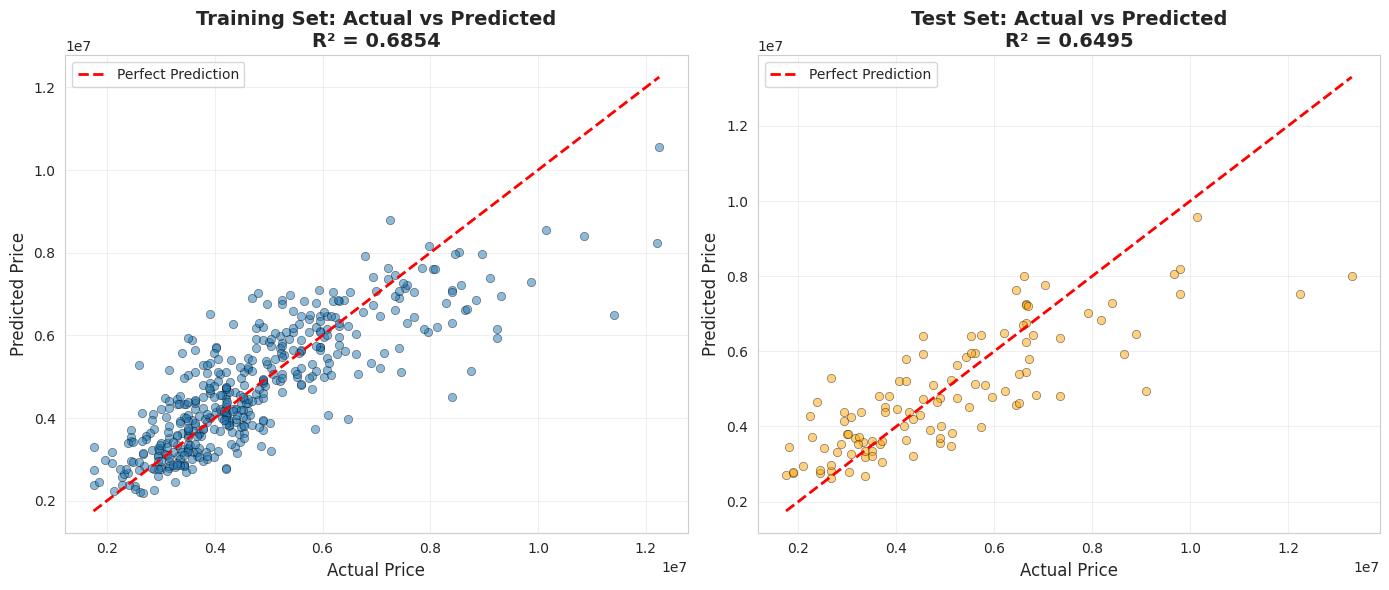

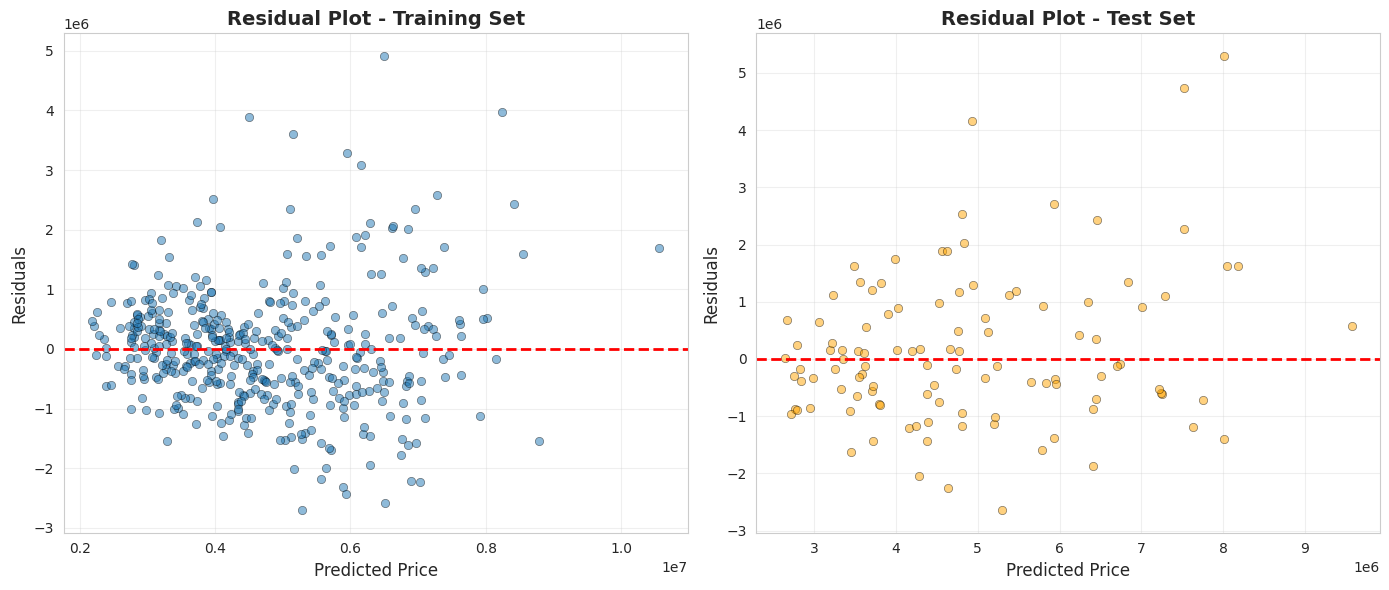

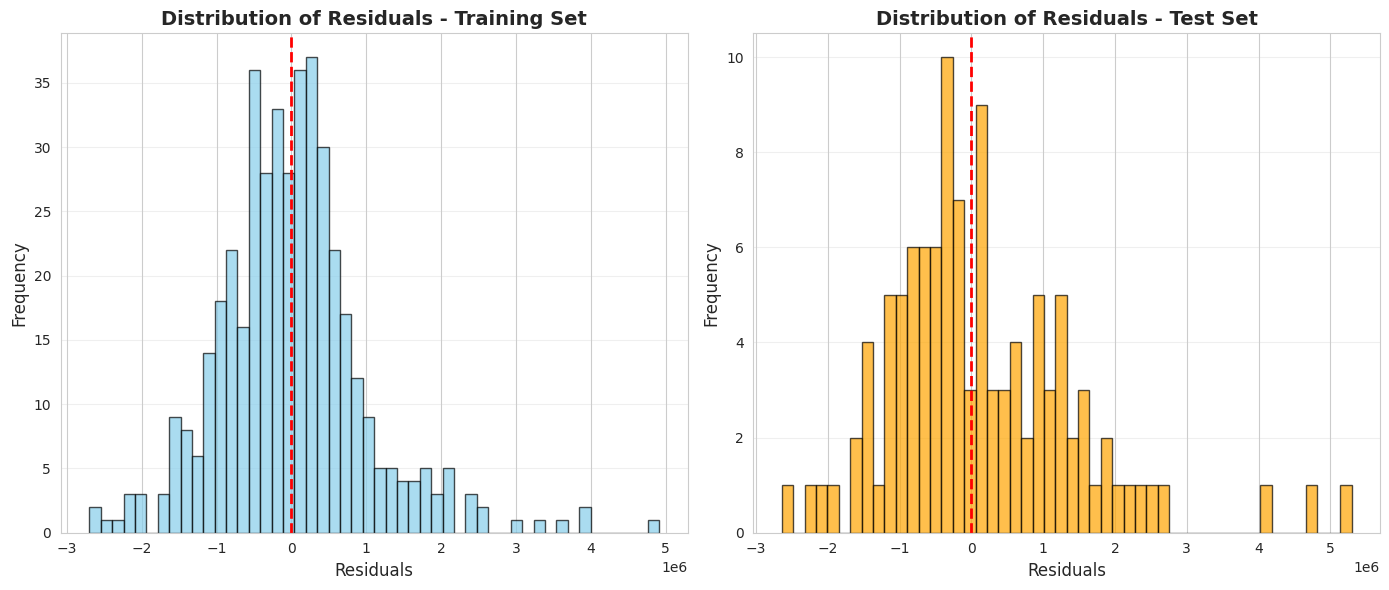

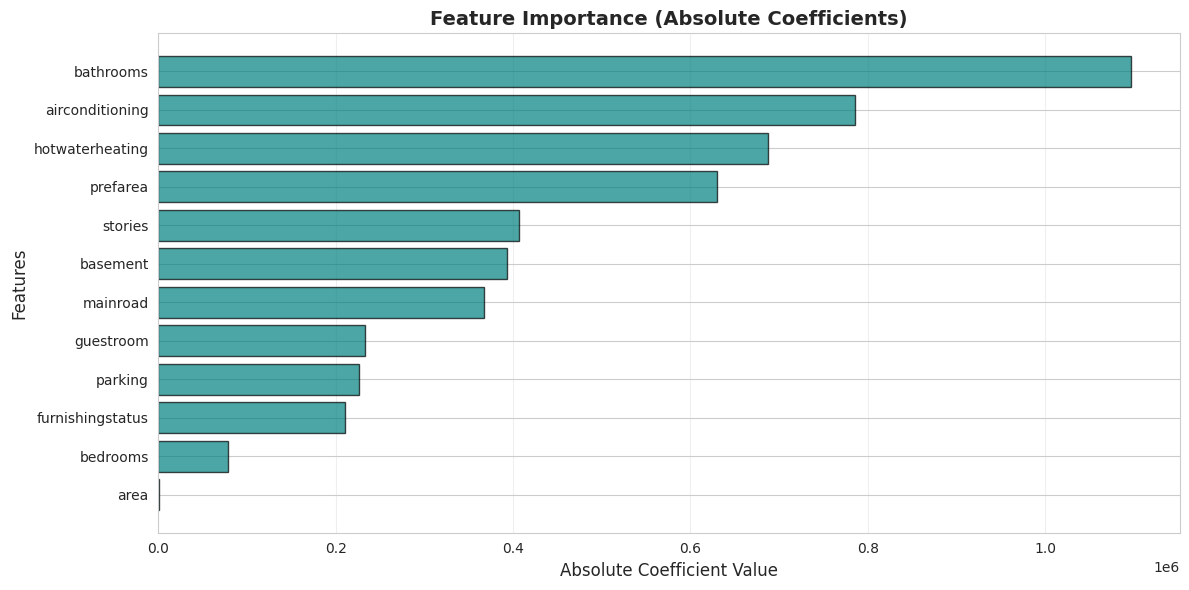


✓ All visualizations saved successfully!


In [11]:
print("\n" + "=" * 70)
print("GENERATING VISUALIZATIONS")
print("=" * 70)

# 1. Actual vs Predicted (Training Set)
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, alpha=0.5, edgecolors='k', linewidth=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
         'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Price', fontsize=12)
plt.ylabel('Predicted Price', fontsize=12)
plt.title(f'Training Set: Actual vs Predicted\nR² = {train_r2:.4f}',
          fontsize=14, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, alpha=0.5, color='orange', edgecolors='k', linewidth=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Price', fontsize=12)
plt.ylabel('Predicted Price', fontsize=12)
plt.title(f'Test Set: Actual vs Predicted\nR² = {test_r2:.4f}',
          fontsize=14, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('actual_vs_predicted.png', dpi=300, bbox_inches='tight')
plt.show()

# 2. Residual Plot
plt.figure(figsize=(14, 6))

train_residuals = y_train - y_train_pred
test_residuals = y_test - y_test_pred

plt.subplot(1, 2, 1)
plt.scatter(y_train_pred, train_residuals, alpha=0.5, edgecolors='k', linewidth=0.5)
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel('Predicted Price', fontsize=12)
plt.ylabel('Residuals', fontsize=12)
plt.title('Residual Plot - Training Set', fontsize=14, fontweight='bold')
plt.grid(alpha=0.3)

plt.subplot(1, 2, 2)
plt.scatter(y_test_pred, test_residuals, alpha=0.5, color='orange', edgecolors='k', linewidth=0.5)
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel('Predicted Price', fontsize=12)
plt.ylabel('Residuals', fontsize=12)
plt.title('Residual Plot - Test Set', fontsize=14, fontweight='bold')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('residual_plot.png', dpi=300, bbox_inches='tight')
plt.show()

# 3. Distribution of Residuals
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.hist(train_residuals, bins=50, edgecolor='black', color='skyblue', alpha=0.7)
plt.xlabel('Residuals', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Residuals - Training Set', fontsize=14, fontweight='bold')
plt.axvline(x=0, color='r', linestyle='--', lw=2)
plt.grid(axis='y', alpha=0.3)

plt.subplot(1, 2, 2)
plt.hist(test_residuals, bins=50, edgecolor='black', color='orange', alpha=0.7)
plt.xlabel('Residuals', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Residuals - Test Set', fontsize=14, fontweight='bold')
plt.axvline(x=0, color='r', linestyle='--', lw=2)
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('residuals_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# 4. Feature Importance (based on absolute coefficients)
plt.figure(figsize=(12, 6))
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': np.abs(model.coef_)
}).sort_values('Importance', ascending=True)

plt.barh(feature_importance['Feature'], feature_importance['Importance'],
         color='teal', alpha=0.7, edgecolor='black')
plt.xlabel('Absolute Coefficient Value', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Feature Importance (Absolute Coefficients)', fontsize=14, fontweight='bold')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ All visualizations saved successfully!")

> ### ***STEP 11: MODEL INTERPRETATION***

In [12]:
print("\n" + "=" * 70)
print("MODEL INTERPRETATION")
print("=" * 70)

print("\n16. KEY INSIGHTS")
print("-" * 70)
print(f"""
1. The model explains {test_r2*100:.2f}% of the variance in house prices (R² score)
2. On average, predictions are off by ₹{test_mae:,.0f} (MAE)
3. The root mean squared error is ₹{test_rmse:,.0f}

Top 3 Most Important Features:
""")

top_features = coefficients.head(3)
for idx, row in top_features.iterrows():
    impact = "increases" if row['Coefficient'] > 0 else "decreases"
    print(f"   • {row['Feature']}: Each unit increase {impact} price by ₹{abs(row['Coefficient']):,.2f}")

print("\n" + "=" * 70)
print("ANALYSIS COMPLETE!")
print("=" * 70)


MODEL INTERPRETATION

16. KEY INSIGHTS
----------------------------------------------------------------------

1. The model explains 64.95% of the variance in house prices (R² score)
2. On average, predictions are off by ₹979,680 (MAE)
3. The root mean squared error is ₹1,331,071

Top 3 Most Important Features:

   • bathrooms: Each unit increase increases price by ₹1,097,117.27
   • airconditioning: Each unit increase increases price by ₹785,550.58
   • hotwaterheating: Each unit increase increases price by ₹687,881.31

ANALYSIS COMPLETE!
